In [1]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('sentencing/sentencing_fips_pop2010.csv', low_memory=False)

In [3]:
# Remove 1 invalid row
df = df[df['race']!='RACE']

In [4]:
df.head()

,Unnamed: 0,fstnm,lstnm,age,dob,race,gender,county,totpts,judge,...,ccimp,cjimp,spimp,primp,lsviol,rpviol,faviol,fips,state,pop_2010
0,0,TERRANCE,MORGAN,29,1980-03-01,BLACK,MALE,miami-dade,113.0,SOTO,...,NO,YES,NO,NO,0,0,0,12086,FL,2496435.0
1,1,MACK,WILLIAMS,48,1959-06-21,BLACK,MALE,duval,98.0,MERRETT,...,NO,YES,NO,NO,0,0,0,12031,FL,864263.0
2,2,EUGENE,MANSO,28,1977-03-07,BLACK,MALE,osceola,64.0,LAUTEN,...,NO,NO,YES,NO,0,0,0,12097,FL,268685.0
3,3,JOHNNY,FELICIANO,64,1946-03-18,WHITE,MALE,palm beach,74.0,MILLER,...,NO,NO,NO,YES,0,0,0,12099,FL,1320134.0
4,4,ROBERT,KING,25,1983-05-19,WHITE,MALE,hillsborough,207.1,"POMPONIO,D",...,YES,NO,NO,YES,0,0,0,12057,FL,1229226.0


In [5]:
# Dataset length
len(df)

1354399

In [6]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1354399 entries, 0 to 1354398
Data columns (total 43 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1354399 non-null  int64  
 1   fstnm          1354399 non-null  object 
 2   lstnm          1354368 non-null  object 
 3   age            1354399 non-null  int64  
 4   dob            1354399 non-null  object 
 5   race           1354399 non-null  object 
 6   gender         1354399 non-null  object 
 7   county         1354390 non-null  object 
 8   totpts         1354399 non-null  float64
 9   judge          1354398 non-null  object 
 10  clfely         1354399 non-null  object 
 11  statut         1354379 non-null  object 
 12  offlvl         1354399 non-null  object 
 13  offdte         1354399 non-null  object 
 14  sentdte        1354399 non-null  object 
 15  sp_total_days  1354399 non-null  int64  
 16  spyrs          1354399 non-null  int64  
 17  spmths  

In [7]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Unnamed: 0,age,totpts,sp_total_days,spyrs,spmths,spdays,cj_total_days,cc_total_days,pr_total_days,docket,prioff,lsviol,rpviol,faviol,fips,pop_2010
count,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354399.00,1354386.00
mean,677199.00,32.88,43.96,2378.87,6.12,4.69,2.67,63.32,33.48,578.24,899343.04,6204.20,0.29,2.47,0.02,12071.02,824829.70
std,390981.46,11.07,79.39,84922.34,231.61,22.40,31.22,995.30,373.88,5627.62,788530.43,3377.18,1.04,4.97,0.58,52.73,678544.93
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,904.00,0.00,0.00,0.00,0.00,8365.00
25%,338599.50,24.00,19.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,525557.00,2323.00,0.00,0.00,0.00,12033.00,297052.00
50%,677199.00,31.00,32.60,0.00,0.00,0.00,0.00,0.00,0.00,180.00,815218.00,8530.00,0.00,0.00,0.00,12086.00,602095.00
75%,1015798.50,41.00,51.20,366.00,0.00,0.00,0.00,30.00,0.00,730.00,1136548.00,9512.00,0.00,6.00,0.00,12103.00,1229226.00
max,1354398.00,114.00,66682.00,3680604.00,9999.00,999.00,999.00,266450.00,364635.00,395604.00,9990933.00,9861.00,4.00,96.00,18.00,12133.00,2496435.00


# Life Sentence Cases & 0 totpts Cases
Previous EDA showed that although there is a 'life' Y/N column in the dataset:
1. There are columns with life = N but spyrs = 99, 999, or 9999 that we can assume to also be life sentences
2. There are columsn with life = Y but with very low totpts that appear to be incorrect data

In [93]:
# Subset dataframe to life = Y OR spyrs >= 99
df_life = df[(df['spyrs']>=99)|(df['life']=='Y')]

In [94]:
print('Life sentence cases: ',len(df_life))
print('Life sentence cases (% of total): ',"{:0.2%}".format(len(df_life)/len(df)))

Life sentence cases:  3565
Life sentence cases (% of total):  0.26%


In [95]:
# Cases with 0 totpts
print('Zero totpts cases: ',len(df[df['totpts']==0]))

Zero totpts cases:  3


Given the extremely small number of cases for life sentences and the prevalence of outliers/potentially incorrect data within the life sentence case data, we remove life sentence cases (defined as life = Y and spyrs >= 99).

Additionally, given the extremely small number of cases with 0 totpts, we also remove these cases.

In [96]:
# Create new df with life sentence cases removed
df2 = df[~((df['spyrs']>=99)|(df['life']=='Y'))]
df2 = df2[df2['totpts']!=0]
len(df2)

1350831

In [97]:
print('Max sp_total_days, including life sentences: ',max(df['sp_total_days']))
print('Max sp_total_days, excluding life sentences: ',max(df2['sp_total_days']))

Max sp_total_days, including life sentences:  3680604
Max sp_total_days, excluding life sentences:  34760


# 44+ Point Cases With No Prison or County Jail Time
There are, interestly, quite a large number of cases with 44+ points (which should generally be state prison) but 0 or very short prison+county jail time.

Some manual checks of these cases indicated incorrect data. Unfortunately, these cases are not identified as outliers in outlier calculations, therefore based on our subject matter knowledge we remove points that are 44+ points but have no state prison or county jail time.

In [98]:
# Create column with prison sentence + county jail
df2['sp_cj_total_days'] = (df2['sp_total_days'])+(df2['cj_total_days'])

In [99]:
df3 = df2[~((df2['sp_cj_total_days']<=7) & (df2['totpts']>44))]
print('Removed rows: ',(len(df2)-len(df3)))
print('Removed rows (% of total): ',"{:0.2%}".format((len(df2)-len(df3))/len(df2)))

Removed rows:  103470
Removed rows (% of total):  7.66%


# Remove 'totpts' Outliers
Then, we remove the obvious outliers for totpts, as there are extreme values (thousands of points) which are likely to be incorrect data.

Because the data is heavily weighted towards smaller crimes, to remove totpts outliers we use the z-score method instead of IQR. If using IQR, because the dataset is weighted towards smaller crimes, even the 75% will be very small, leading to a much lower upper bound than we would with the z-score method.

count    1247361.000000
mean          40.742325
std           52.964642
min            0.200000
25%           18.600000
50%           30.300000
75%           44.200000
max        19439.000000
Name: totpts, dtype: object

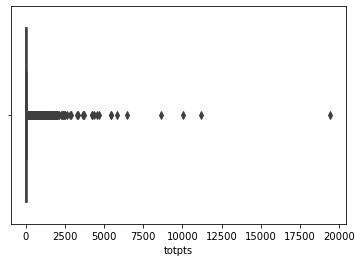

In [100]:
# Totpts distribution - raw data
sns.boxplot(x=df3['totpts'])
df3['totpts'].describe().apply(lambda x: format(x, 'f'))

In [101]:
# Identify and remove values 3 std deviations away from mean
totpts_z = np.abs(stats.zscore(df3['totpts']))
totpts_z_filtered = (totpts_z < 3)
df4 = df3[totpts_z_filtered]

In [102]:
# Results of removing outliers
print('Rows removed:', len(df3) - len(df4))
print('% of rows removed:', "{:0.2%}".format((len(df3) - len(df4))/len(df3)))
print('Max totpts (original):', max(df3['totpts']))
print('Max totpts (outliers removed):', max(df4['totpts']))

Rows removed: 14092
% of rows removed: 1.13%
Max totpts (original): 19439.0
Max totpts (outliers removed): 199.6


Removing points greater than 3 standard deviations from the mean removed 0.58% of rows in the dataset, bringing the max totpts down to around 200.

count    1233269.000000
mean          37.521491
std           29.717478
min            0.200000
25%           18.400000
50%           30.000000
75%           43.500000
max          199.600000
Name: totpts, dtype: object

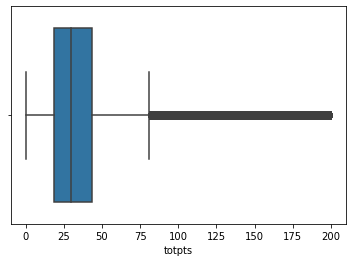

In [103]:
# Totpts distribution - outliers removed
sns.boxplot(x=df4['totpts'])
df4['totpts'].describe().apply(lambda x: format(x, 'f'))

# Identify & Remove State Prison + County Jail Time by 'totpts' Group
If we simply remove sp_total_days and/or cj_total_days outliers across the entire dataset, we will not be able to identify incorrect data (e.g. cases with very small points but extremely high sentence time).

Given that totpts should, in general, correlate with sentence time, extreme outliers can be deemed as data errors and need to be removed to minimize skewed results in our models.

In [104]:
# Create bins for totpts
# Use 0-22, 22-44 according to what we know about Florida sentencing
# 0-22: usually no prison sentence, 22-44: judge has discretion), 44+: usually state prison
# For > 44, apply generic interval range of 15

cut_bins = [0, 22] + np.arange(44, max(df4['totpts'])+10, 10).tolist()
cut_labels = np.arange(0,len(cut_bins)-1,1).tolist()
df4['totpts_cut_range'] = pd.cut(df4['totpts'], bins=cut_bins)
df4['totpts_cut_group'] = pd.cut(df4['totpts'], bins=cut_bins, labels=cut_labels)

/var/folders/v2/rqvjg7j17md_7n7kljrh4rvc0000gp/T/ipykernel_55208/3447310508.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['totpts_cut_range'] = pd.cut(df4['totpts'], bins=cut_bins)
/var/folders/v2/rqvjg7j17md_7n7kljrh4rvc0000gp/T/ipykernel_55208/3447310508.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['totpts_cut_group'] = pd.cut(df4['totpts'], bins=cut_bins, labels=cut_labels)


In [105]:
# Look at cut sies to make sure there is sufficient sample size in each cut
df4[['totpts_cut_range','totpts_cut_group']].value_counts()

totpts_cut_range  totpts_cut_group
(22.0, 44.0]      1                   538997
(0.0, 22.0]       0                   395984
(44.0, 54.0]      2                    77276
(54.0, 64.0]      3                    61614
(64.0, 74.0]      4                    38021
(74.0, 84.0]      5                    29344
(84.0, 94.0]      6                    22247
(94.0, 104.0]     7                    16540
(104.0, 114.0]    8                    11804
(114.0, 124.0]    9                     8946
(124.0, 134.0]    10                    7052
(134.0, 144.0]    11                    6051
(144.0, 154.0]    12                    4854
(154.0, 164.0]    13                    4187
(164.0, 174.0]    14                    3381
(174.0, 184.0]    15                    3152
(184.0, 194.0]    16                    2406
(194.0, 204.0]    17                    1413
dtype: int64

In [106]:
df4.groupby(['totpts_cut_group'])['sp_cj_total_days'].describe()

,count,mean,std,min,25%,50%,75%,max
totpts_cut_group,,,,,,,,
0,395984.0,65.873545,583.764022,0.0,0.0,0.0,38.00,133225.0
1,538997.0,190.294907,1251.384835,0.0,0.0,2.0,270.00,133225.0
2,77276.0,639.672706,1088.384607,8.0,365.0,465.0,660.00,132860.0
3,61614.0,886.686419,1803.615149,8.0,366.0,705.0,909.00,133226.0
4,38021.0,1107.751558,1749.632709,8.0,453.0,900.0,1095.00,219364.0
5,29344.0,1321.415826,2405.251893,8.0,540.0,1095.0,1440.00,266450.0
6,22247.0,1647.660538,2414.822029,8.0,720.0,1320.0,1800.00,132860.0
7,16540.0,1856.175816,2380.249954,8.0,730.0,1534.0,1825.00,132860.0
8,11804.0,2030.200102,2126.117675,8.0,804.5,1800.0,2190.00,32850.0


In [107]:
# Create function for defining outliers as points greater than 3 standard deviations from the mean

def is_outlier(s):
    lower_limit = s.mean() - (s.std() * 3)
    upper_limit = s.mean() + (s.std() * 3)
    return ~s.between(lower_limit, upper_limit)

In [108]:
# Remove rows with 'sp_total_days' outliers within the totpts buckets
df5 = df4[~df4.groupby('totpts_cut_group')['sp_cj_total_days'].apply(is_outlier)]

In [109]:
print('Rows removed: ',len(df4)-len(df5))
print('Percent of rows removed: ',"{:0.2%}".format((len(df4)-len(df5))/len(df4)))

Rows removed:  5339
Percent of rows removed:  0.43%


In [110]:
df5.groupby(['totpts_cut_group'])['sp_cj_total_days'].describe()

,count,mean,std,min,25%,50%,75%,max
totpts_cut_group,,,,,,,,
0,395141.0,56.280707,135.947932,0.0,0.0,0.0,35.00,1811.0
1,538086.0,166.996848,299.329187,0.0,0.0,2.0,270.00,3923.0
2,76539.0,578.792668,453.162364,8.0,365.0,462.0,624.00,3893.0
3,61152.0,805.775788,704.058389,8.0,366.0,698.0,900.00,6210.0
4,37600.0,1000.077128,834.062501,8.0,450.0,900.0,1095.00,6300.0
5,29075.0,1205.870301,1042.629849,8.0,540.0,1095.0,1440.00,8434.0
6,21861.0,1451.207264,1231.004465,8.0,720.0,1315.0,1800.00,8820.0
7,16225.0,1650.072173,1354.306541,8.0,720.0,1530.0,1825.00,8760.0
8,11538.0,1799.409863,1394.955862,8.0,730.0,1786.0,2160.00,8395.0


Text(0.5, 1.0, "Excluding Outliers: Distribution of 'sp_total_days' by totpts Group")

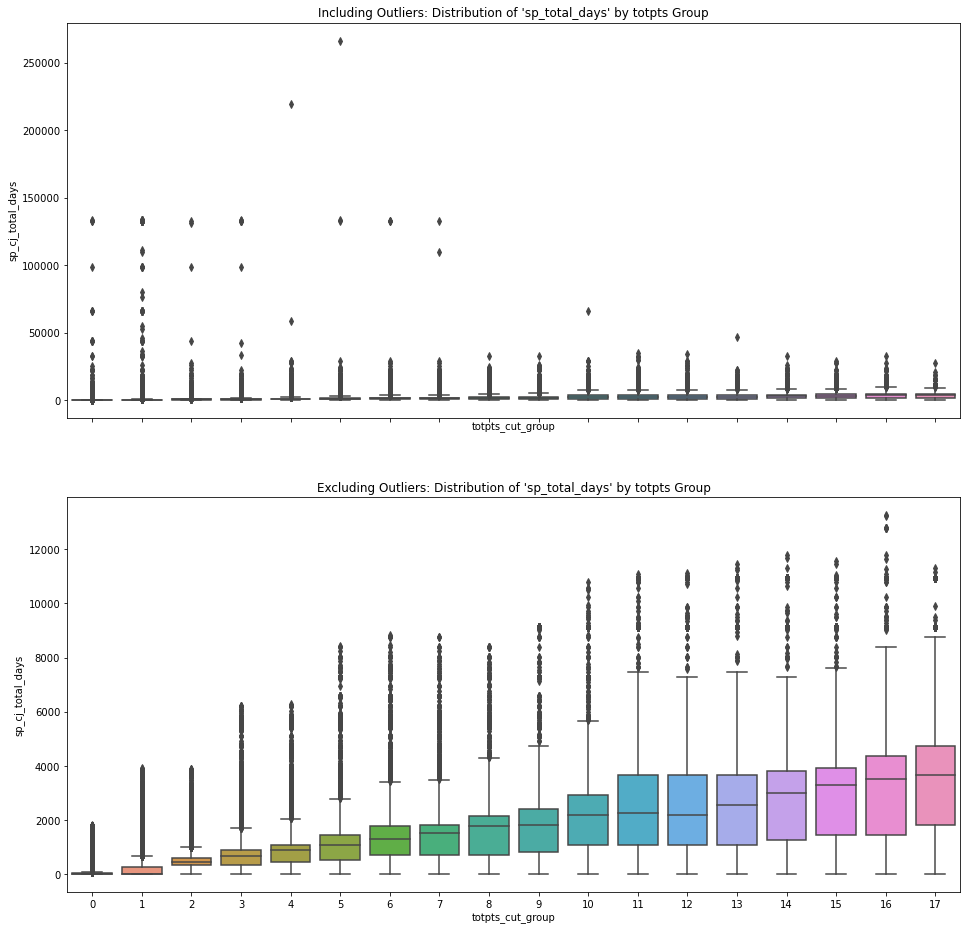

In [111]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,16))
sns.boxplot(x='totpts_cut_group', y='sp_cj_total_days', data=df4, ax=axes[0])
sns.boxplot(x='totpts_cut_group', y='sp_cj_total_days', data=df5, ax=axes[1])
axes[0].set_title("Including Outliers: Distribution of 'sp_total_days' by totpts Group")
axes[1].set_title("Excluding Outliers: Distribution of 'sp_total_days' by totpts Group")

# Total Rows Removed

In [112]:
print('Rows removed: ',len(df)-len(df5))
print('Percent of rows removed: ',"{:0.2%}".format((len(df)-len(df5))/len(df)))

Rows removed:  126469
Percent of rows removed:  9.34%


### Setence by totpts Cut Group and Race

In [113]:
# Mean and Median by Race
mean_race = df5.groupby(['totpts_cut_group', 'race'])['sp_cj_total_days'].mean().unstack().reset_index()
median_race = df5.groupby(['totpts_cut_group', 'race'])['sp_cj_total_days'].median().unstack().reset_index()

In [114]:
mean_race

race,totpts_cut_group,BLACK,OTHER,WHITE
0,0,59.666089,55.457369,54.652374
1,1,183.572511,157.237783,157.482331
2,2,581.863621,599.383848,575.542829
3,3,808.629022,877.823888,800.713110
4,4,991.559466,1054.902326,1006.581398
5,5,1227.616413,1350.464427,1179.747846
6,6,1460.738990,1661.925197,1431.157539
7,7,1671.961970,1790.625000,1622.103488
8,8,1766.822835,2001.806324,1824.145962
9,9,1966.591501,2372.469072,2006.678477


<AxesSubplot:xlabel='totpts_cut_group'>

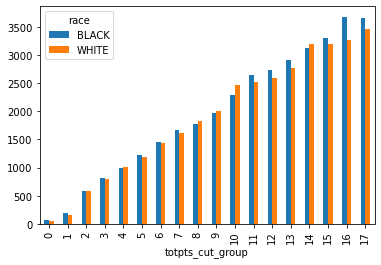

In [115]:
mean_race.plot.bar(x = 'totpts_cut_group', y = ['BLACK', 'WHITE'])

<AxesSubplot:xlabel='totpts_cut_group'>

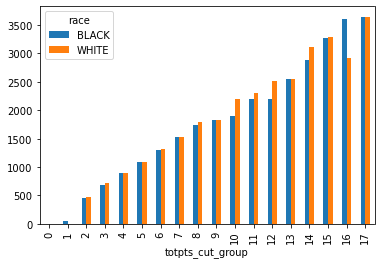

In [116]:
median_race.plot.bar(x = 'totpts_cut_group', y = ['BLACK', 'WHITE'])